# Value at Risk
#### variance-covariance method

In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Create our portfolio of equities
tickers = ['AAPL','FB', 'C', 'DIS']
 
# Set the investment weights (I arbitrarily picked for example)
weights = np.array([.25, .3, .15, .3])
 
# Set an initial investment level
initial_investment = 1000000
 
# Download closing prices
data = pdr.get_data_yahoo(tickers, start="2020-01-01", end=dt.date.today())['Close']
data.tail()

Symbols,AAPL,FB,C,DIS
Date,,,,
2021-05-10,126.849998,305.970001,75.129997,184.300003
2021-05-11,125.910004,306.529999,74.870003,181.669998
2021-05-12,122.769997,302.549988,74.230003,177.850006
2021-05-13,124.970001,305.260010,75.290001,178.339996
2021-05-14,127.449997,315.940002,76.559998,173.699997


## Percentage change

In [3]:
#From the closing prices, calculate periodic returns
returns = data.pct_change()

returns.tail()

Symbols,AAPL,FB,C,DIS
Date,,,,
2021-05-10,-0.025805,-0.041087,0.000666,-0.002921
2021-05-11,-0.007410,0.001830,-0.003461,-0.014270
2021-05-12,-0.024939,-0.012984,-0.008548,-0.021027
2021-05-13,0.017920,0.008957,0.014280,0.002755
2021-05-14,0.019845,0.034987,0.016868,-0.026018


## Create var cov matrix

In [4]:
cov_matrix = returns.cov()
cov_matrix

Symbols,AAPL,FB,C,DIS
Symbols,,,,
AAPL,0.000734,0.000545,0.000495,0.000350
FB,0.000545,0.000728,0.000440,0.000334
C,0.000495,0.000440,0.001428,0.000744
DIS,0.000350,0.000334,0.000744,0.000782


## Calculate the portfolio mean and standard deviation

### Calculate mean returns for each stock

In [5]:
avg_rets = returns.mean()
avg_rets

Symbols
AAPL    0.001905
FB      0.001555
C       0.000546
DIS     0.000847
dtype: float64

### Calculate mean returns for portfolio overall,

In [6]:
# using dot product to 
# normalize individual means against investment weights
 # https://en.wikipedia.org/wiki/Dot_product#:~:targetText=In%20mathematics%2C%20the%20dot%20product,and%20returns%20a%20single%20number.
port_mean = avg_rets.dot(weights)
port_mean

0.0012789706079641336

### Calculate portfolio standard deviation

In [7]:
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
port_stdev

0.023495930616159025

### Calculate mean of investment

In [8]:
mean_investment = (1+port_mean) * initial_investment
mean_investment

1001278.9706079641

### Calculate standard deviation of investmnet

In [9]:
stdev_investment = initial_investment * port_stdev
stdev_investment

23495.930616159025

## Calculate the inverse of the normal cumulative distribution (PPF) with a specified confidence interval, standard deviation, and mean

In [10]:
# Select our confidence interval (I'll choose 95% here)
conf_level1 = 0.05

# Using SciPy ppf method to generate values for the
# inverse cumulative distribution function to a normal distribution
# Plugging in the mean, standard deviation of our portfolio
# as calculated above
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)
cutoff1

962631.6039153747

## Estimate the value at risk (VaR) for the portfolio by subtracting the initial investment from the calculation in step 4

In [11]:
var_1d1 = initial_investment - cutoff1
var_1d1

37368.396084625274

## Value at risk over n-day time period

1 day VaR @ 95% confidence: 37368.4
2 day VaR @ 95% confidence: 52846.89
3 day VaR @ 95% confidence: 64723.96
4 day VaR @ 95% confidence: 74736.79
5 day VaR @ 95% confidence: 83558.27
6 day VaR @ 95% confidence: 91533.5
7 day VaR @ 95% confidence: 98867.48
8 day VaR @ 95% confidence: 105693.79
9 day VaR @ 95% confidence: 112105.19
10 day VaR @ 95% confidence: 118169.24
11 day VaR @ 95% confidence: 123936.95
12 day VaR @ 95% confidence: 129447.92
13 day VaR @ 95% confidence: 134733.67
14 day VaR @ 95% confidence: 139819.74
15 day VaR @ 95% confidence: 144727.18


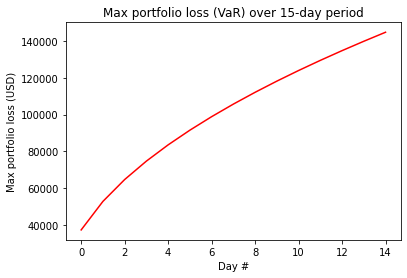

In [12]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")
